# Práctica calificada 1

Profesor: [Carlos Adrián Alarcón](https://www.linkedin.com/in/carlos-adrian-alarcon-delgado/)



## Descripción

Bienvenidos a su primera práctica calificada.

Como no podía ser de otra manera, lo que van a hacer es predecir la nota de unos alumnos. Pueden encontrar el dataset [aquí](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?select=student-por.csv). La idea es que puedan utilizar todas las variables posibles, sin embargo, tengan en consideración la información que van a tener disponible al momento de la predicción (no traten de predecir la nota en función a si aprobó o no).

### Entendiendo machine learning (3 pts)

Ustedes son asesores estudiantiles y quieren determinar la nota de los alumnos, sin embargo, el primer objetivo que ustedes tienen es **explicar** qué factores son los que generan una mayor o menor nota. En su clase de analítica predictiva, ustedes han revisado modelos más explicables y menos explicable, y atentamente han escuchado a su profesor sobre cuáles son estos modelos. Lo que se necesita ahora es utilizar un modelo explicable. Implementalo en las siguientes líneas de código. Recuerda aplicar el `train_test_split`.

In [92]:
##### IMPORTACIONES NECESARIAS ########

# Para manipular y analizar los datos
import pandas as pd
# Para operaciones numéricas con arrays
import numpy as np
# Visualización de datos
import matplotlib.pyplot as plt
# Muestra múltiples salidas en una sola celda
from IPython.display import display

# Algoritmo de regresión de los k vecinos más cercanos
from sklearn.neighbors import KNeighborsRegressor

# Para trabajar con árboles de decisión
from sklearn import tree
from sklearn.tree import plot_tree

# Para regresión usando bosques aleatorios
from sklearn.ensemble import RandomForestRegressor
# Para clustering mediante el algoritmo k-means
from sklearn.cluster import KMeans

#######################################

In [93]:
### DATASET

# URLs de los datasets (SUBIDO A MI GITHUB) para una mejor extración
url_mat = 'https://raw.githubusercontent.com/Anthony1078/PC1_ADSP/main/archive/student-mat.csv'
url_por = 'https://raw.githubusercontent.com/Anthony1078/PC1_ADSP/main/archive/student-por.csv'

# Cargando los datasets
data_mat = pd.read_csv(url_mat)
data_por = pd.read_csv(url_por)

# Mostrar las primeras filas de cada dataset para verificar
#print(data_mat.head())
#print(data_por.head())

# Aplicando un gradiente de color al DataFrame
display(data_mat.head().style.background_gradient(cmap='coolwarm'))
display(data_por.head().style.background_gradient(cmap='coolwarm'))


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


Error cuadrático medio: 32.63865546218487


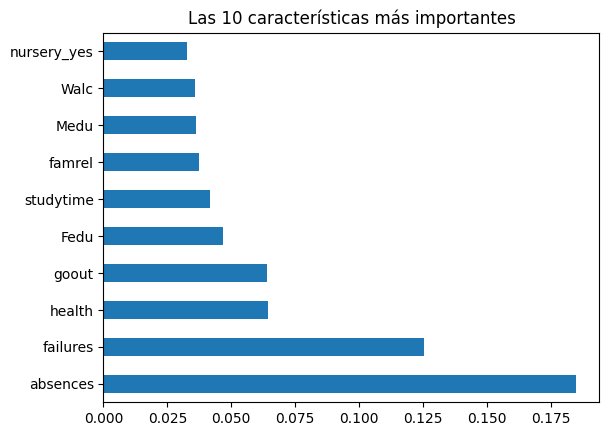

In [94]:
### MODELO

# Preparar los datos
X = data_mat.drop(['G1', 'G2', 'G3'], axis=1)  # Excluimos calificaciones previas
y = data_mat['G3']

# Codificación de variables categóricas
X_encoded = pd.get_dummies(X)

# División en entrenamiento y prueba
# Usamos el 30% para el conjunto de pruebas y 70% para entrenar el modelo, generador de números aleatorios (42).
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Modelo de árbol de decisión
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')

# Importancia de las características
feature_importance = pd.Series(tree.feature_importances_, index=X_train.columns).nlargest(10)
feature_importance.plot(kind='barh', title='Las 10 características más importantes')
plt.show()





Escribe aquí las principales conclusiones del modelo e indica cuáles son las variables más importantes (las que llevan a los alumnos a tener mejor nota). Indica claramente las implicaciones y las acciones que desencadenarían en función a los resultados

### Feature engineering (4 pts)

Como científicos de datos, ustedes han escuchado que generar nuevas variables y transformar las existentes es importante para mejorar el desempeño de un modelo. En esta parte, deberás proponer, construir e incluir en el modelo al menos 5 variables (si ya las utilizaste en la anterior sección, identifica una nueva forma de transformarla, p.e. un encoding diferente para una variable categórica, además del famoso `one hot encoding`). Recuerda que estas nuevas variables tienen que tener sentido y si son encodings nuevos, tienen que respetar el tipo de dato de la variable categórica.

In [95]:

# Creación de nuevas características
data_mat['studytime_total'] = data_mat['studytime'] * data_mat['freetime']
data_mat['health_alcohol'] = data_mat['Dalc'] + data_mat['Walc']

# Actualización de X con las nuevas características
X = pd.get_dummies(data_mat.drop(['G1', 'G2', 'G3'], axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento con nuevas características
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
new_mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio mejorado: {new_mse}')



Error cuadrático medio mejorado: 32.596638655462186


Describe cada variable creada y explica el por qué crees que podría mejorar el poder predictivo del modelo.

Evalua el impacto en la precisión de la predicción de estas nuevas variables haciendo uso de una métrica vista en clase. Explica qué significa esta métrica e indica qué versión es mejor (pregunta 1 vs pregunta 2)

studytime_total = studytime (tiempo de estudio) + freetime (tiempo libre )

Esta variable se justica debido a que La idea detrás de esta variable es capturar la interacción entre el tiempo que los estudiantes dedican a estudiar y su tiempo libre. Es posible que los estudiantes que equilibran bien ambos aspectos tiendan a tener mejores resultados académicos.


health_alcohol = Suma del consumo diario de alcohol (Dalc) y el consumo de alcohol en fin de semana (Walc).

Esta variable se justica debido a que intenta reflejar el consumo total de alcohol de un estudiante.



**El MSE es el promedio de los cuadrados de los errores**, es decir, la diferencia cuadrada media entre los valores observados (reales) y los valores predichos por el modelo. Un MSE menor indica que las predicciones del modelo son más cercanas a los valores reales, lo que implica una mejor precisión del modelo.

### Descubriendo a los vecinos más cercanos (3 pts)

Aplica el algoritmo `KNN` con la cantidad de vecinos más conveniente que creas (deberás iterar con varios para determinar cuál es la mejor versión). Muestra las métricas de desempeño y comparalos con los algoritmos de las preguntas anteriores

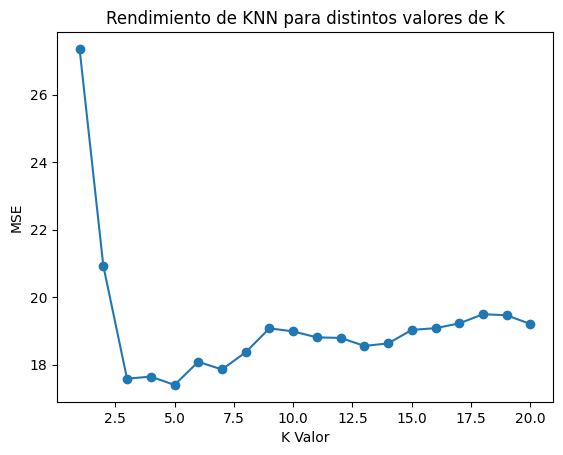

In [96]:
errors = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))

# Gráfico de errores por K
plt.plot(range(1, 21), errors, marker='o')
plt.xlabel('K Valor')
plt.ylabel('MSE')
plt.title('Rendimiento de KNN para distintos valores de K')
plt.show()


La gráfica muestra que el rendimiento del modelo KNN mejora significativamente a medida que incrementamos k de 1 a 7, sugiriendo que k=1 está sobreajustado. **Con k mayores a 7, el MSE se estabiliza, lo que indica que valores en este rango ofrecen un buen balance entre sesgo y varianza, evitando el sobreajuste.**

### Aplicando los árboles de decisión (3 pts)

En este punto te toca aplicar un árbol de decisión. Puedes utilizar las variables que creas conveniente. Al finalizar, dibuja el árbol e identifica qué potenciales problemas tienen los árboles de decisiones y cómo solucionarlos.

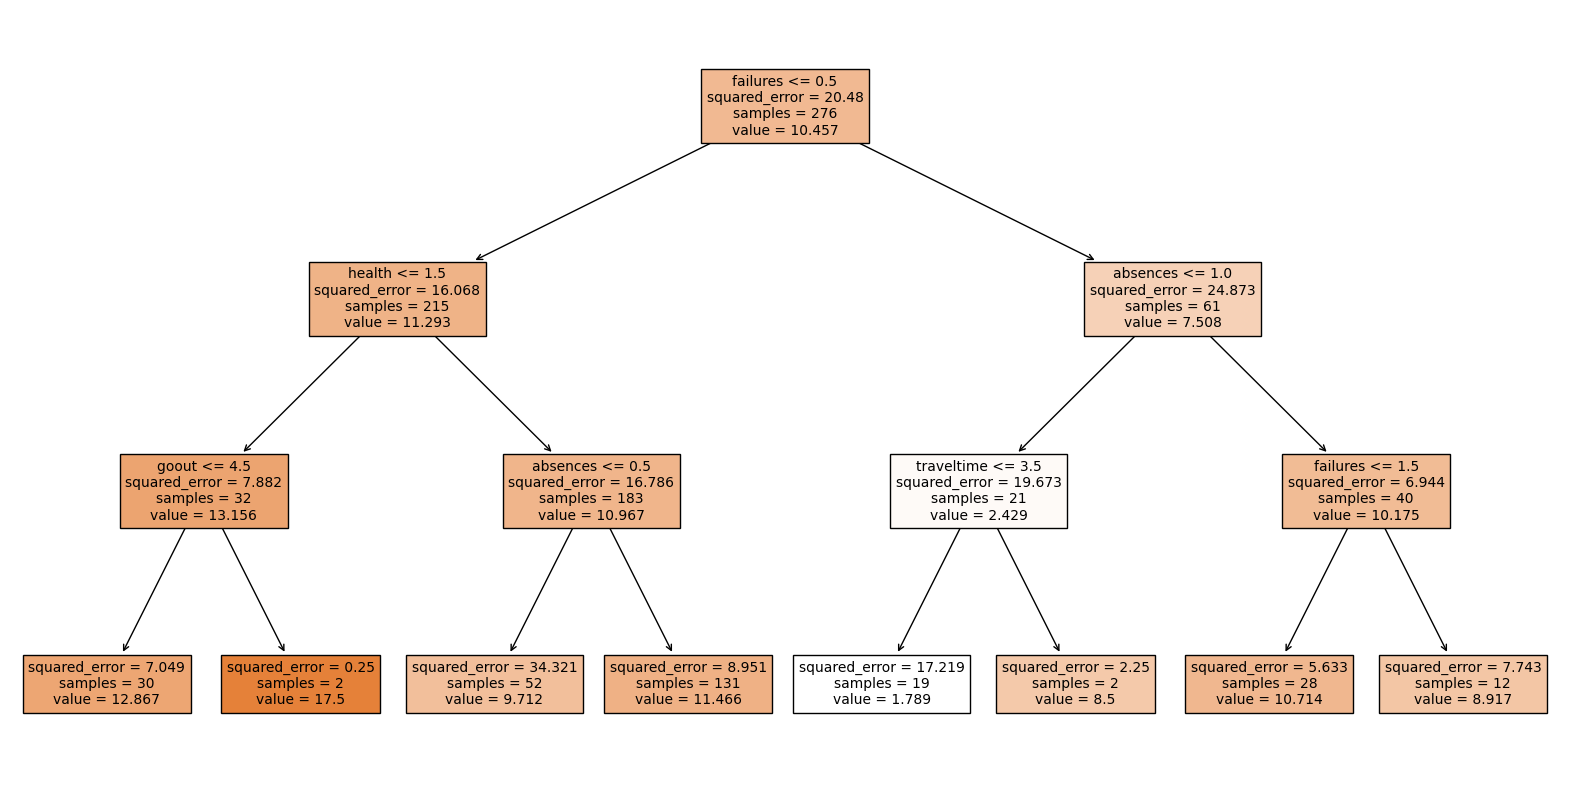

In [98]:


# Árbol con profundidad limitada para visualización
tree_vis = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_vis.fit(X_train, y_train)

# Visualización
plt.figure(figsize=(20, 10))
plot_tree(tree_vis, filled=True, feature_names=X_encoded.columns, fontsize=10)
plt.show()


La visualización muestra que **health, failures y absences son características importantes**, basadas en su aparición en los primeros niveles del árbol.

### Ensambles (3 pts)

Ahora te toca aplicar el modelo `Random Forest`. Identifica intuitivamente (con ciclos for principalmente) los mejores parámetros e indica qué significa cada uno de ellos. Puedes usar todas las variables que consideres conveniente. Asimismo, investiga sobre el error out-of-bag y explica qué es el bagging, en qué consiste, y cómo el error out-of-bag me sirve para identificar sobreajuste (define qué es sobreajuste antes). Con eso, identifica el error out-of-bag en tu modelo e interpretalo. Finalmente, implementa cualquier modelo de boosting y compara los modelos que has entrenado hasta ahora, desde la pregunta 1 e identifica cuál es el mejor en la métrica que hayas escogido. Justifica el por qué de la métrica y genera conclusiones de negocio en función a la respuesta teórica de la pregunta 1.

In [99]:


# Random Forest con cálculo de error out-of-bag
forest = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
forest.fit(X_train, y_train)
print(f'OOB Puntuación: {forest.oob_score_}')


OOB Puntuación: 0.21629359991516484


Se utilizó un modelo **"RandomForestRegressor"** con 100 árboles y se incluyó el parametro **"oob_score=True"** ya que este habilita el cálculo del error OOB, que es una forma de evaluar el rendimiento del modelo sin necesidad de un conjunto de validación separado.

### Clusterización (4 ptos.)

Ahora ya no les toca ser consejeros estudiantiles, sino analistas que están revisando a qué alumnos les darían una beca. Para eso, lo que tienen que hacer es realizar una clusterización de los alumnos. Identifica (justifica el número de clústeres identificados) los clústeres, interprétalos e indica a qué clúster le darían la beca y por qué (recuerden que las becas son limitadas y deberían ir a quienes realmente las necesitan y las van a poder aprovechar).

In [100]:

# Preparar los datos
X_encoded = pd.get_dummies(data_mat.drop(['G1', 'G2', 'G3'], axis=1))

# Diagnosticar dimensiones
print("Dimensiones de X_encoded:", X_encoded.shape)

# Aplicar K-Means para identificar grupos de estudiantes
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_encoded)

# Diagnosticar el resultado del clustering
print("Número de clústeres asignados:", len(clusters))

####  VALIDACIONES NECESARIAS ####
# Asegurarse que el DataFrame original está listo para recibir la nueva columna
if 'Cluster' in data_mat.columns:
    data_mat.drop('Cluster', axis=1, inplace=True)

data_mat['Cluster'] = clusters

# Revisar si hay columnas no numéricas y eliminarlas para el análisis
non_numeric_columns = data_mat.select_dtypes(exclude=[np.number]).columns
data_for_analysis = data_mat.drop(columns=non_numeric_columns)

# Análisis de los clústeres y diagnóstico
cluster_means = data_for_analysis.groupby('Cluster').mean()
print(cluster_means)



Dimensiones de X_encoded: (395, 58)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Número de clústeres asignados: 395
               age      Medu      Fedu  traveltime  studytime  failures  \
Cluster                                                                   
0        16.500000  2.611702  2.462766    1.537234   1.643617  0.367021   
1        17.131579  2.986842  2.500000    1.368421   1.842105  0.500000   
2        16.682540  2.801587  2.603175    1.365079   2.738095  0.182540   
3        17.800000  3.000000  3.000000    1.400000   2.000000  0.400000   

           famrel  freetime     goout      Dalc      Walc    health  \
Cluster                                                               
0        3.877660  2.882979  3.000000  1.436170  2.260638  3.585106   
1        3.750000  3.368421  3.315789  1.763158  2.789474  3.473684   
2        4.150794  3.722222  3.166667  1.380952  2.047619  3.555556   
3        4.200000  2.200000  2.600000  1.400000  2.000000  3.600000   

          absences         G1         G2         G3  studytime_total  \
Cluster        

Recomendaría otorgar las becas a los estudiantes del **Cluster 0**. Aunque tienen calificaciones promedio y un nivel moderado de ausencias, su consumo de alcohol es relativamente bajo.

### Reflexión (hasta 3 ptos.)

La idea de esta sección es que, de manera concienzuda, crítica, y a un nivel universitario, puedan identificar las oportunidades y ventajas de los modelos que han utilizado en esta práctica y cómo podrían servir para los casos de uso planteados. Recuerden que no necesariamente queremos el modelo más preciso, sino que va a depender del uso que le vamos a dar. Asimismo, indica qué otro enfoque le darían al problema y qué se puede hacer para mejorar las métricas. Finalmente, reflexiona acerca de las métricas utilizadas e indica qué otras métricas podrías haber usado. Lo que quiero saber es su proceso de pensamiento y de decisión. Esta parte es opcional pero si la llenan correctamente al nivel esperado van a tener una buena bonificación, debido a que la calificación será rigurosa.

**Variedad de modelos**

Utilizamos una variedad de modelos, incluyendo árboles de decisión, k-vecinos más cercanos, bosques aleatorios y k-medias.
Esta diversidad nos permitió explorar diferentes enfoques y entender cómo cada modelo aborda el problema de manera única.


**Interpretación de resultados**

Al visualizar los árboles de decisión y analizar los perfiles de los clústeres,
pudimos interpretar los resultados de manera significativa y entender las relaciones entre las variables predictoras y la variable objetivo.

En cuanto a métricas, se utilizó el error cuadrático medio (MSE) para evaluar el rendimiento de nuestros modelos.